# Exercise 1

## Problem Description

When developing any code for numerical simulations it is best to start with a problem that has an analytical solution that we can use for code validation. The heat transfer in steady-state conditions (i.e. not time dependent) is one of the simplest examples to solve. Given a problem domain we apply heat source of temperature $T_2$ to one side of the domain while keeping the temperature on the other side at a constant temperature $T_1$.

The change in the temperature throughout the domain is described by the second order heat equation

$$\frac{\partial T}{\partial t}= c^2 \frac{\partial ^2 T}{\partial x^2},$$

where $T$ is the temperature, $c$ is the thermal diffusivity of the domain and $x$ presents the physical location along the domain.

This is a second-order differential equation in space ($x$) and first-order in time ($t$). However, at steady state, the temperature is time-invariant, so the $\frac{\partial T}{\partial t}$ is $0$ and the equations simplifies to a second-order ordinary differential equation (ODE) in space: 

$$0= c^2 \frac{\partial T}{\partial x},$$


This differential equation can be easily solved analytically. The solution for temperature is a linear change in temperature along the bar. To demonstrate how FEM works we will solve this differential equation. 

It is important to note that Finite Element Method doesn't solve the exact differential equation, but instead works with its weak form. Differential equations can be expressed in two ways: 
- Strong Form: This is the differential equation itself. When solved with the given boundary conditions, it provides the exact solution. However, solving the strong form can be challenging due to the strict mathematical requirements imposed on the solution.

- Weak Form: This is derived by multiplying the differential equation by a test function (chosen to satisfy specific conditions) and integrating over the domain. While the weak form does not necessarily yield the exact solution, it ensures that the equation holds in an averaged sense across the domain, making it more tractable for numerical methods like FEM.

For a short tutorial on weak form solutions please refer to: https://www.youtube.com/watch?v=k4AoE-rJ6n8

## Step 1. Discretisation

The problem domain is a bar of length 10 meters and height of 1 meter. The first step in the Finite Element Method (FEM) is to divide it into finite elements, a process known as meshing. While the distribution of stresses and forces within complex geometries may be difficult to determine directly, through meshing we can represent this complex domain as a collection of simple shapes, called elements. Within these elements, we can apply our understanding of material behaviour and governing equations to achieve accurate simulations.

For simple geometries, such as rectangles, meshing can be done manually. However, for more complex domains with irregular shapes or curved edges, meshing becomes challenging. In regions with fine details, a higher level of refinement (i.e. smaller elements) is needed to accurately capture the geometry.

In general, a finer mesh with smaller elements leads to a more accurate solution by reducing approximation errors. However, increasing the number of elements also enlarges the system of linear equations, requiring more computational resources such as time and memory. Additionally, element quality plays a crucial role in numerical stability. Elements with a high aspect ratio, where one side is significantly longer than the others, can cause numerical instabilities and increase errors in the solution. Therefore, careful meshing is essential to balance accuracy, efficiency, and computational cost.

Meshing is a major area of research, with significant effort dedicated to developing efficient and accurate techniques. Numerous software tools and packages, both free and commercial, are available for meshing. These tools incorporate advanced, optimized algorithms to generate high-quality meshes for various applications. 

### Element Types

There are two key elements properties to consider: shape and order. The first is generally guided by the domain properties, while the second is by the differential equations. 

#### Element Shape
Two most popular elements types for $2D$ are triangles and quadrilaterals. Below are two examples of splitting the same domain with triangles and with quadrilaterals. 

<img src="img/triangular_mesh.png" alt="element_types" width="600">
<img src="img/rectangularmesh.png" alt="element_types" width="600">

The element shape is usually determined by the problem domain. Quadrilaterals are better suited for regular domains with structured meshes, while triangles are better suited for irregular or curved domains. Therefore triangles are generally the preferred element type. 

#### Element Order
It is important to choose the correct element order for the system, as it can impact the quality of the solution. Each element is associated with a certain number of nodes and each node is a degree of freedom for the solution. Each node is also associated with a basis function that is used to describe the solution (see next section). Therefore higher order elements provide more degrees of freedom and can better describe complex behaviour of solution.  




<img src="img/element_types.png" alt="element_types" width="500">


However, more degrees of freedom also lead to larger linear system of equations. Similarly to the refinement considerations, it is a trade off between computational cost and solution error. In general, quadratic elements tend to be sufficient. However, if you have higher order differential equations it may be worth considering cubic.

###### Key Take Aways:
- Higher refinement and higher element order lead to lower approximation error in solution but higher computational costs.
- Triangular elements are most common element types
- Quadratic or linear elements should be sufficient for many problems. 
- Numerical simulations are about finding the right balance in computation costs and solution accuracy.

### Exercise
For this code we will use a python package called `pygmsh`. By specifying the domain boundaries we can automatically mesh the domain. In the code below specify the boundaries of the domain and elements degree. 
By plotting the elements and nodes we can visualise the mesh.

- Try changing the domain boundaries and the degree to see how the mesh will change.

Mesh is an object that contains the information about all the elements, nodes and their coordinates on the domain. Each node had a unique ID associated with it, that we will make use in later sections. `mesh.points` is the list of coordinates for all the nodes in the mesh.

- Use length of `mesh.points` to find out the number of nodes in the mesh. Try changing the element degree or the element size and see how that changes the number of nodes.


In [72]:
import pygmsh
import numpy as np
import plotly.graph_objects as go
import os
import sys
sys.path += [".", ".."]


# ------------ User Input required --------------------#
## Domain boundaries
x_min = 0
x_max = 10
y_min = 0
y_max = 1

degree = 2  # this is the degree of the elements that we are planning to use


element_size = 1 # this is the minimum element length.

# ------------ End of User Input  --------------------#


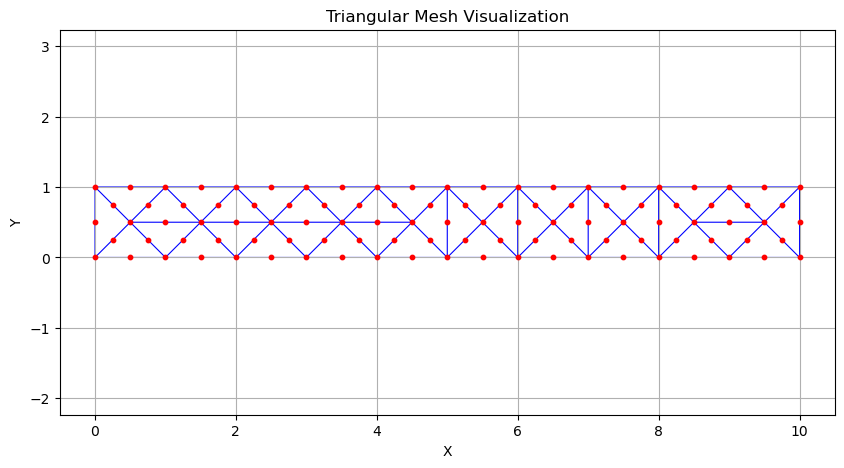

In [73]:
## Code to create the mesh and visualise it
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation

# Create a geometry and generate a mesh
with pygmsh.geo.Geometry() as geom:
    # Define a square geometry (side length = 1)
    square = geom.add_rectangle(xmin=x_min, xmax=x_max, ymin=y_min, ymax=y_max, z=0,  mesh_size=1)  # Approximate mesh size)

    # Generate the mesh
    mesh =  geom.generate_mesh(dim = 2, algorithm=6, order = degree) ## order 2 changes from linear to quadratic, element order
    
points = mesh.points  # Coordinates of the mesh points

## Visualising the mesh
points = mesh.points  # Coordinates of the mesh points
cells = mesh.cells_dict  # Dictionary of cell types and their connectivity

## define the name of elements in the mesh
if degree == 1:
    element_name = 'triangle'
elif degree== 2:
    element_name = 'triangle6'
    
if element_name in cells: ## this relies on the quadratic elements
    triangles = np.array(cells[element_name])[:,:3] ## only grab the corner nodes and not the midnotes
else:
    raise ValueError("The mesh does not contain triangular elements.")

# Prepare data for Triangulation
x, y = points[:, 0], points[:, 1]
triangulation = Triangulation(x, y, triangles)

# Plot the mesh
plt.figure(figsize=(10, 5))
plt.triplot(triangulation, color='blue', lw=0.8)
plt.scatter(x, y, color='red', s=10, zorder=5)  # Highlight the points
plt.title("Triangular Mesh Visualization")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.grid(True)
plt.show()


## Step 2. Key Element Functions
### Basis Functions

After subdividing the domain into smaller elements, we approximate the solution $T$ to the differential equation within each element. This is done by expressing the solution in terms of basis functions $\phi$,  such that the approximation of $T$ at any point $x$ is given by a linear combination of these basis functions and a set of coefficients $c_i$
$$T(x) = \sum_{i=1}^nc_i \phi_i,$$

where $n$ is the number of nodes in the element, and $c_i$ represents the solution values at those nodes. The primary objective of the Finite Element Method (FEM) is to determine these coefficients, allowing interpolation of the solution throughout the domain.

The basis functions $\phi_i$ define how the solution varies within each element and depend on the type of elements used in the mesh. There are a variety of basis functions that can be used, provided they meet specific mathematical criteria. Among them, polynomial functions are the most commonly used, as they are both computationally efficient and sufficient for most applications.

Every basis function is associated with a node in the element. The basis functions must satisfy the following properties:

- Compact Support:  basis function is defined only within a single finite element or a limited number of elements and is zero elsewhere.

- Interpolation Property : the basis function must be of value 1 at the corresponding node and 0 for at all other nodes. 

- Partition of Unity : the sum of all non-zero basis functions at point $x$ must be 1, 
$$\sum_i N_i(x) = 1$$

A simple example of basis functions are hat functions. For a linear line element where the nodes are places at values $x=0$ and $x=1$ the corresponding basis functions would be $\phi_0$ and $\phi_1$ defined as in the image below over interval $[-1,2]$

<img src="img/hat_functions_as_basis.png" alt="hat_functions_as_basis" width="500">

We can see that $\phi_0$ is 1 at the node $0$ and it linearly reduces to $0$ at the neighbouring nodes. That linear behaviour between the nodes makes it a linear element.

For a unit triangle of degree 2 with six nodes there are six corresponding basis functions detailed below.

| <img src="img/isoparametric_triangle.png" alt="Description" width="300"> | <div style="text-align: left; line-height: 2.0;">$\phi_0 = (1-s-r)(1-2r-2s)$<br> $\phi_1 = r(2r-1)$<br> $\phi_2=s(2s-1)$<br> $\phi_3=4r(1-r-s)$<br> $\phi_4=4rs$<br> $\phi_5=4s(1-r-s)$</div> | (1) |
|---|---|---|

##### Implementation Note:
Note the order of the nodes and the basis functions. It is standard practice to number the corner nodes first and then the mid-side nodes in clockwise or counter-clockwise order. It is important to be consistent for all triangles in the mesh. 
For `pygmsh` library that we are using here, the nodes are ordered in counter-clockwise and use standard convention of corner nodes first and them mid-side, so we will follow the same order here for basis functions.

For additional information on elements and basis functions please refer to https://www.geophysik.uni-muenchen.de/~igel/Lectures/NMG/08_finite_elements_basisfunctions.pdf

### Exercise
The basis functions for linear and quadratic triangle elements have been implemented below. You can view the basis function for each node by specifying up to three nodes in the `show_basis_fn` below and calling a function `visualise_basis_fn()` from file `Support_functions`

In [74]:

# ------------ User Input required --------------------#
# In the list below put up to three node IDs of the basis functions to be view
show_basis_fn=[0,3,1] # e.g. [0,3,1]

# ------------ End of User Input  --------------------#

In [75]:
#This is for elements in 2D
def basis_functions(degree, point):
    ## Givent the coordinate of the integration point in the local coordinate system
    ## we evaulate the basis functions at that point 
    
    r = point[0]
    s = point[1]
    
    if degree == 1:
        basis_functions = np.zeros((3,)) ## for each basis function
        ## Corner nodes first
        basis_functions[0] = (1 - s - r)
        basis_functions[1] = r 
        basis_functions[2] = s  
        
    ## quadratic elements
    if degree==2:
        basis_functions = np.zeros((6,)) ## for each basis function
        ## Corner nodes first
        basis_functions[0] = (1 - s - r)*(1-2*r-2*s)
        basis_functions[1] = r * (2*r - 1)
        basis_functions[2] = s * (2*s - 1)#
        #mid side nodes:
        
        basis_functions[3] = 4*r*(1-r-s)
        basis_functions[4] = 4*r*s
        basis_functions[5] = 4*s*(1-r-s)
        
    return basis_functions

In [76]:
from FEM_Module.Support_functions import visualise_basis_fn
# function to visualise the basis functions
visualise_basis_fn(show_basis_fn, basis_functions)

### Basis Functions Derivatives
In many differential equations, we often require the derivatives of the basis functions rather than the functions themselves. For two dimensional space there are two partial derivatives, one with respect to each axis, which are

$$\frac{\partial }{\partial r},\frac{\partial}{\partial s}$$

If the basis functions at a specific point are represented as a vector that contains the values of all the basis functions, then their derivatives for a matrix of dimension $[m,n]$, where $m$ is the spatial dimension (in this case two) and $n$ is the number of nodes in the element (i.e. the number of basis functions). This matrix is often referred to be $B$:

$$B=
\begin{bmatrix}
\frac{\partial{\phi_0}}{\partial r} & \cdots & \frac{\partial{\phi_5}}{\partial r} \\
\frac{\partial{\phi_0}}{\partial s}  & \cdots & \frac{\partial{\phi_5}}{\partial s} \end{bmatrix}
$$
where $\phi_0 \cdots \phi_5$ are the basis functions and $r$ and $s$ are the dimension axis. 

#### Exercise
For the quadratic triangle the matrix the derivative matrix $B$ is of size $2x6$. Based on the equations in $(1)$ calculate the second row derivatives, i.e. $\frac{\partial}{\partial s}$ and complete the function below instead of `...`.
The derivative $\frac{\partial}{\partial r}$ is given below and implemented as example.

$$B=
\begin{bmatrix}
-3 +4r+4s & -1+4r & 0 & 4-8r-4s & 4s & -4s\\
. .. & ...& ...& ... &... &... \end{bmatrix}
$$
 
<span style="color:blue">Note: The solution to this exercise can be found in hidden cell marked "Solution". Double click on the cell to open it.</span>


 

In [8]:
# ------------ User Input required --------------------#
def basis_functions_dNs(degree,point):
    # Derivative of basis functions with respect to s
    r = point[0]
    s = point[1]
    if degree == 1:
        dNs = np.zeros((3,)) ## for each basis function
        ## Corner nodes first
        dNs[0] = -1
        dNs[1] = 0.
        dNs[2] = 1.

    if degree==2:
        dNs = np.zeros((6,)) ## for each basis function
        ## Corner nodes first
        dNs[0] = ...
        dNs[1] = ...
        dNs[2] = ...

        dNs[3] = ...
        dNs[4] = ...
        dNs[5] = ...

    return dNs
# -------------- End of User Input ------------------------#


def basis_functions_der(degree, point):
    ## Givent the coordinate of the point in the local coordinate system (r,s)
    ## we evaulate the basis functions at that point 

    ## linear elements
    if degree == 1:
        dNr = basis_functions_dNr(1,point)
        dNs = basis_functions_dNs(1,point)
       
        basis_functions = np.vstack((dNr,dNs)) 
        
    ## quadratic elements
    if degree==2:
        dNr = basis_functions_dNr(2,point)
        dNs = basis_functions_dNs(2,point)
        basis_functions = np.vstack((dNr,dNs))
        
    return basis_functions


def basis_functions_dNr(degree,point):
    # Derivative of basis functions with respect to r
    r = point[0]
    s = point[1]
    
    # linear eleemnt
    if degree == 1:
        dNr = np.zeros((3,)) ## for each basis function
        ## Corner nodes first
        dNr[0] = -1
        dNr[1] = 1
        dNr[2] = 0.

    
    if degree==2:
        dNr = np.zeros((6,)) 
        ## Corner nodes first
        dNr[0] = -3. + 4. * r + 4. * s
        dNr[1] = -1. + 4. * r
        dNr[2] = 0.

        dNr[3] = 4. - 8. * r - 4. * s
        dNr[4] = 4. * s
        dNr[5] = -4*s
    return dNr
        

               
        

In [78]:
# ------------ User Input required --------------------#
def basis_functions_dNs(degree,point):
    # Derivative of basis functions with respect to s
    r = point[0]
    s = point[1]

    if degree==2:
        dNs = np.zeros((6,)) ## for each basis function
        ## Corner nodes first
        dNs[0] = -3. + 4. * r + 4. * s
        dNs[1] = 0.
        dNs[2] = -1. + 4. * s

        dNs[3] = -4. * r
        dNs[4] =  4. * r
        dNs[5] = 4. - 4. * r - 8. * s

    return dNs


# -------------- End of User Input ------------------------#


def basis_functions_der(degree, point):
    ## Givent the coordinate of the point in the local coordinate system (r,s)
    ## we evaulate the basis functions at that point 

    ## linear elements
    if degree == 1:
        dNr = basis_functions_dNr(1,point)
        dNs = basis_functions_dNs(1,point)
       
        basis_functions = np.vstack((dNr,dNs)) 
        
    ## quadratic elements
    if degree==2:
        dNr = basis_functions_dNr(2,point)
        dNs = basis_functions_dNs(2,point)
        basis_functions = np.vstack((dNr,dNs))
        
    return basis_functions


def basis_functions_dNr(degree,point):
    # Derivative of basis functions with respect to r
    r = point[0]
    s = point[1]
    
    # linear eleemnt
    if degree == 1:
        dNr = np.zeros((3,)) ## for each basis function
        ## Corner nodes first
        dNr[0] = -1
        dNr[1] = 1
        dNr[2] = 0.

    
    if degree==2:
        dNr = np.zeros((6,)) 
        ## Corner nodes first
        dNr[0] = -3. + 4. * r + 4. * s
        dNr[1] = -1. + 4. * r
        dNr[2] = 0.

        dNr[3] = 4. - 8. * r - 4. * s
        dNr[4] = 4. * s
        dNr[5] = -4*s
    return dNr
        

               
        

<details>
<summary><span style="color:red">Solution. (*Hidden content here, visible but not collapsible on GitHub.*) </span></summary>
    
The $B$ matrix is 
    $$B=
\begin{bmatrix}
-3 +4r+4s & -1+4r & 0 & 4-8r-4s & 4s & -4s\\
-3+4r+4s & 0 & -1+4s & -4r & 4r& 4-4r-8s \end{bmatrix}
$$
   and the functions should look similar to the following.
    Copy from here->>
    ```
def basis_functions_dNs(degree,point):
    # Derivative of basis functions with respect to s
    r = point[0]
    s = point[1]

    if degree==2:
        dNs = np.zeros((6,)) ## for each basis function
        ## Corner nodes first
        dNs[0] = -3. + 4. * r + 4. * s
        dNs[1] = 0.
        dNs[2] = -1. + 4. * s

        dNs[3] = -4. * r
        dNs[4] =  4. * r
        dNs[5] = 4. - 4. * r - 8. * s

    return dNs
    ```
</details>

### Exercise
Calculate the basis functions and their derivatives for a quadrilateral two dimensional linear element in coordinate system $(r,s)$ and implement them below. The element boundaries are at $[-1,1]$x$[-1,1]$.

Reminder that the basis function must satisfy the mathematical properties: compact support, interpolation property and partition of unity.  

##### Hint:
For quadrilateral linear element there are four basis functions. The basis function for node $0$ is given provided, you can use its structure to find the other basis functions and fill in the missing parts instead of `...`.

Once you know the basis functions, it is easy to find the derivatives by differentiating each basis function with respect to r or s.


<span style="color:blue">Note: The solution to this exercise can be found in hidden cell marked "Solution". Double click on the cell to open it.</span>


In [17]:
### Basis functions for linear quadrilateral element at a point
### the local r axis is along x dimension and s is along the y dimension
def basis_fn_quad_linear(point):
    r = point[0]
    s = point[1]
    
    basis_functions = np.zeros((4,)) ## for each basis function
    
    ## Corner nodes first
    basis_functions[0] = 0.25 * (1 - r)*(1 - s)
    basis_functions[1] = ...
    basis_functions[2] = ...
    basis_functions[2] = ...

        
    return basis_functions

                
### Derivatives of the linear quadrilateral element
def basis_fn_quad_linear_der_dNr(degree,point):
    # Derivative of basis functions with respect to r
    r = point[0]
    s = point[1]
    

    dNr = np.zeros((4,)) 
    dNr[0] = ...
    dNr[1] = ...
    dNr[2] = ...
    dNr[3] = ...
        
    return dNr
        
def basis_fn_quad_linear_der_dNs(degree,point):
    # Derivative of basis functions with respect to s
    r = point[0]
    s = point[1]
    
    dNs = np.zeros((4,)) ## for each basis function
    ## Corner nodes first
    dNs[0] = ...
    dNs[1] = ...
    dNs[2] = ...
    dNs[3] = ...

    return dNs
        
               

def basis_fn_quad_linear_der(degree, point):
    ## Givent the coordinate of the point in the local coordinate system (r,s)
    ## we evaulate the basis functions at that point 
    
    ## linear elements
    if degree == 1:
        dNr = basis_fn_quad_linear_der_dNr(1,point)
        dNs = basis_fn_quad_linear_der_dNs(1,point)
       
        basis_functions = np.vstack((dNr,dNs)) 
        
    return basis_functions

<details>
<summary><span style="color:red">Solution.</span></summary>
```
### Basis functions for linear quadrilateral element at a point
### the local r axis is along x dimension and s is along the y dimension
def basis_fn_quad_linear(point):
    r = point[0]
    s = point[1]
    
    basis_functions = np.zeros((4,)) ## for each basis function
    
    ## Corner nodes first
    basis_functions[0] = 0.25 * (1 - r)*(1 - s)
    basis_functions[1] = 0.25 * (1 + r)*(1 - s)
    basis_functions[2] = 0.25 * (1 + r)*(1 + s)
    basis_functions[2] = 0.25 * (1 - r)*(1 + s)

        
    return basis_functions

                
### Derivatives of the linear quadrilateral element
def basis_fn_quad_linear_der_dNr(degree,point):
    # Derivative of basis functions with respect to r
    r = point[0]
    s = point[1]
    

    dNr = np.zeros((4,)) 
    dNr[0] = -0.25 * (1. - s)
    dNr[1] = 0.25 * (1. - s)
    dNr[2] = 0.25 * (1 + s)
    dNr[3] = -0.25 * ( 1 + s)
        
    return dNr
        
def basis_fn_quad_linear_der_dNs(degree,point):
    # Derivative of basis functions with respect to s
    r = point[0]
    s = point[1]
    
    dNs = np.zeros((4,)) ## for each basis function
    ## Corner nodes first
    dNs[0] = -0.25 * ( 1 - r)
    dNs[1] = -0.25 * ( 1 + r)
    dNs[2] = 0.25 * (1 + r)
    dNs[3] = 0.25 * ( 1 - r)

    return dNs
        
               

def basis_fn_quad_linear_der(degree, point):
    ## Givent the coordinate of the point in the local coordinate system (r,s)
    ## we evaulate the basis functions at that point 
    
    ## linear elements
    if degree == 1:
        dNr = basis_fn_quad_linear_der_dNr(1,point)
        dNs = basis_fn_quad_linear_der_dNs(1,point)
       
        basis_functions = np.vstack((dNr,dNs)) 
        
    return basis_functions

    ```
</details>

#### Jacobian Matirx

It is important to note that the basis functions discussed above are defined for specific unit triangles and quadrilaterals that use a local coordinate system. These elements, known as isoparametric elements, are structured to have regular shapes with right angles, such as squares and right-angled triangles. In these elements, the basis functions derived from the element geometry are also used to describe the solution field.

Isoparametric elements are particularly useful when working with unstructured meshes, where the elements may vary in size and shape, unlike the uniform triangular mesh described earlier. In such cases, each irregular element in the global coordinate system $(x,y)$ can be mapped to a reference isoparametric element in the local coordinate system $(r,s)$, allowing the same basis functions to be applied consistently across all elements.

<img src="img/mapping_to_isoparametric.png" alt="mapping_to_isoparametric" width="400">

This mapping allows for more consistent and easier implementation in software. During the mapping process the area and orientation of the triangle may change and that transformation of the element is summarised in Jacobian matrix. 


$$
\begin{equation}
\it{J} = 
\begin{bmatrix}
\frac{\partial{x}}{\partial r} & \frac{\partial{y}}{\partial r} \\
\frac{\partial{x}}{\partial s} & \frac{\partial{y}}{\partial s} \\
\end{bmatrix}
\end{equation}
$$

where $\phi$ are the basis functions and $i$ is ID of corresponding node. The determinant of the matrix represents the change and orientation in the triangle area. By multiplying the basis functions by the Jacobian we can map the isoparametric basis functions to the global basis functions of the original element. 

To calculate the Jacobian matrix we multiply the derivatives of the basis functions by the global coordinates of the corresponding nodes:


$$
\begin{equation}
\it{J} = 
\begin{bmatrix}
\sum\frac{\partial{\phi_i}}{\partial r}x_i & \sum\frac{\partial{\phi_i}}{\partial r}y_i \\
\sum\frac{\partial{\phi_i}}{\partial s}x_i & \sum\frac{\partial{\phi_i}}{\partial s}y_i \\
\end{bmatrix}
\end{equation}
$$

The calculation of the Jacobian matrix is implemented in the function below. The size of the Jacobian matrix depends on the dimensions of the local and global coordinate systems. In our case both coordinate systems are two dimensional therefore the Jacobian is $2x2$ matrix.

Note: for interested reader please refer here for more details: https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/jacobian/v/the-jacobian-matrix

In [79]:
def jacobian(degree, point, e_nodes):
    #e_nodes is numpy array (num_nodes, 2) of all the global coordinates of the nodes
    space_dim = 2 ## for now we assume dimension is 2
    
    ## in this case we are mapping 2D space to 2D so Jacobian is a square
    Jacobian_mat = np.zeros((space_dim,space_dim))
    
    dnr = basis_functions_dNr(degree, point)
    dns = basis_functions_dNs(degree, point)

    for dim in range(2):
        Jacobian_mat[0,dim] =np.dot(dnr, e_nodes[:,dim])# x coordinate
        Jacobian_mat[1,dim] =np.dot(dns, e_nodes[:,dim])# y coordinate
    
    det = np.linalg.det(Jacobian_mat)
    return det, Jacobian_mat
        
    

## Step 3. Matrix Assembly

The next step in Finite Element Method is accumulation into the linear system of equations. As mentioned previously we iterate over each element and calculate the element stiffness matrix $K^e$ that is derived from the weak form of the governing equations. 

$$K^e=\int_{\Omega^e}B^Tc^2 B d\Omega,$$

where $\Omega^e$ is the element domain, $B$ is a matrix of basis function derivatives and $c$ is the thermal diffusivity. 





### Integration
Part of the weak form solution is to perform integration of the governing differential equations over each element domain. To perform numerical integration we use Gaussian Quadrature. This approximates the integral of a function over a domain as a weighted sum of the function $f$ evaluated at specific points.
 $$\int_{\Omega^e} f(x) dx \approx \sum_{j=1}^m w_jf(x_j),$$
where $x_j$ are the specific Gaussian points of integration, $w_j$ are the corresponding weights and $m$ is the total number of Gaussian points.

The Gaussian points are specific for the different domain shapes and the degree of the function $f$. For isoparametric triangle of degree $2$ we should use at least three integration points. Using too few integration points will lead to inaccurate integration and subsequently the solution. Using too many integration points will not improve the solution, but will impact the computational time, since for each element we have to iterate over each integration point.

For unit triangles of degree two or less then integration points are implemented below.

For more information on Gaussian Quadrature please watch: https://www.youtube.com/watch?v=Hu6yqs0R7GA


In [80]:
## Quadratic tirangular elements
def integration_points(degree):
    Points = np.array([[1/6.,2/3.],[1/6.,1/6],[2/3.,1/6.]])
    weights = np.array([1/6.,1/6.,1/6.,1/6.])

    return Points, weights


### Local and Global Node IDs
Final step in accumulation of linear system of equations is deriving the connectivity matrix. As we iterate over each element the basis functions and the element stiffness matrix use local node IDs, which are the same across all elements. To correctly identify the solution at each node, the nodes are also given global node IDs. The connectivity matrix is a list of arrays, where each row stores the global node IDs for an element. The connectivity row for the element below is `[0 21 44 63 17 3]`, since it follows the order of the local IDs (in red)

<img src="img/element_in_mesh.png" alt="element_in_mesh" width="400">


#### Exercise 
Construct the connectivity matrix for the following mesh and fill in the array below instead of `...`.
<img src="img/rectangular_mesh_simple.png" alt="rectangular_mesh_simple" width="500">

<span style="color:blue">Note: The solution to this exercise can be found in hidden cell marked "Solution". Double click on the cell to open it.</span>


In [20]:

# ------------ User Input required --------------------#
quad_mesh_connectivity=[[...],[...],[...],[...],[...],[...]]

# ------------ End of User Input  --------------------#

<details>
<summary><span style="color:red">Solution.</span></summary>
    quad_mesh_connectivity=[[0,1,7,6],[1,2,8,7],[2,3,9,8],[3,4,10,9],[4,5,11,10]]
    ```
</details>

### Accumulation
For this step we perform the accumulation of the linear system of equations of the form $Ax=b$. Where A is the matrix of size [n,n], where $n$ is the number of nodes in the system. Each row corresponds to the node with that ID and the column entries in that row will only be non-zero if the nodes are connected.

In [81]:
# Set up 
num_nodes = len(points) # total number of nodes 
MatrixThermalConduct = 51.9615 # this depends on the material 
space_dim = 2 # domain space dimension
print("There are ", num_nodes, " nodes in the mesh")

# Set up the empty linear system of equations
A_matrix = np.zeros((num_nodes, num_nodes))
b = np.zeros((num_nodes,))

There are  103  nodes in the mesh


For every element the order of accumulating the element stiffness matrix is:
- Get the list of integration points and the list of global coordinates of nodes
- Create an empty element stiffness matrix
- For each integration points:
    - calculate the basis functions or their derivatives at the integration point
    - using the weak form equation multiply out the basis function
    - multiply by the material properties
    - calculate the Jacobian matrix and its determinant
    - multiply by the weight of the integration points and the Jacobian determinant
    - add to the element stiffness matrix
- Add to the global matrix $A$ using the connectivity matrix

In [82]:

## Iterate through each element in the mesh 
for element in cells[element_name]:
    
    # get the list of integration points and the list of global IDs for nodes in the element
    IntegrationPoints, IP_weights = integration_points(degree)
    e_nodes_xy = points[element][:,:space_dim]
    
    ## we first get the local stiffness matrix for the element by accumulating
    ## over all the integration points
    LHS = np.zeros((len(element), len(element)))
    for IP, weight in zip(IntegrationPoints,IP_weights):
        B = basis_functions_der(degree, IP)
        BT = B.transpose() * MatrixThermalConduct
        BT = np.matmul(BT, B)
        detJ, _ = jacobian(degree, IP, e_nodes_xy)
        BT = BT * weight*(detJ) 
        LHS += BT # this is a element level stiffness matrix
        
    ## once LHS has been accumulated over all the integration points, we add it to the global matrix A_matrix
    ## this uses the global node IDs to determine which indices are updates
    for i in range(len(element)):
        for j in range(len(element)):
            col = int(element[i])
            row = int(element[j])
            A_matrix[row][col]+= LHS[int(j)][int(i)]


## Step 4. Boundary Conditions
There are two primary types of boundary conditions: Dirichlet and Neumann. Dirichlet boundary conditions specify the exact value of the solution at certain points, while Neumann boundary conditions define the value of the solution's derivative. These boundary conditions contribute to the right-hand side vector $b$ in the system of equations.

In this exercise, we apply Dirichlet boundary conditions because a heat source maintains the temperature at $10^\circ C$ along the left boundary, while a cooling source keeps the right boundary at $0^\circ C$. To enforce this, we assign a value of $10$ in the vector $b$ at the indices corresponding to the nodes on the left boundary. Additionally, the corresponding rows in the matrix $A$ are modified by setting all elements to zero except for $1$ along the diagonal. We repeat the same for the right boundary nodes, except the right-hand side vector $b$ remains at zero. This ensures that the solution vector $x$ correctly reflects the prescribed temperatures at those boundaries.

To identify the nodes on the left and right boundaries, we note that their $x$-coordinates correspond to the $x$-limits of the bar: $0$ and $10$, respectively. We can use the `points` list of the `mesh` object (this contains list of global coordinates of all the nodes) to identify these nodes.

In [83]:
## identify the nodes along the right and left boundaries

right_ = np.where(mesh.points[:, 0] == 10)[0]
left_ = np.where(mesh.points[:, 0] == 0)[0]
top_ = np.where(mesh.points[:,1] == 1)[0]
bottom_=np.where(mesh.points[:,1] == 0)[0]

## Check that the coordinates of the nodes in the boudnaries lie on the min and max x-values of domain
print("right:",mesh.points[right_], "\n\nleft:",mesh.points[left_])


right: [[10.   0.   0. ]
 [10.   1.   0. ]
 [10.   0.5  0. ]] 

left: [[0.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.5 0. ]]


In [84]:
# Apply the boundary conditions

## Apply temperature of 100  on left and 0 on the right
for node in right_:
    # set the right hand side vector value
    b[node] = 0.
    # set the corresponding row in matrix A to identity
    A_matrix[node,:] = 0
    A_matrix[node, node] = 1.
    
for node in left_:
    # set the right hand side vector value
    b[node] = 100.
    # set the corresponding row in matrix A to identity
    A_matrix[node,:] = 0
    A_matrix[node, node] = 1.


Finally solve the linear system of equations for solution vector $x$.

In [85]:
## solve the linear systme of equations
x = np.linalg.solve(A_matrix, b)


## Step 5. Solution Visualisation

After solving for $x$ we analyse the results. In this exercise, we expect the temperature to vary linearly from the left to the right boundary. To visualise this, we can plot the nodes on a map and color them based on the temperatures in the solution vector. This provides a quick and effective way to verify the expected linear relationship, which we can see from the plot below.


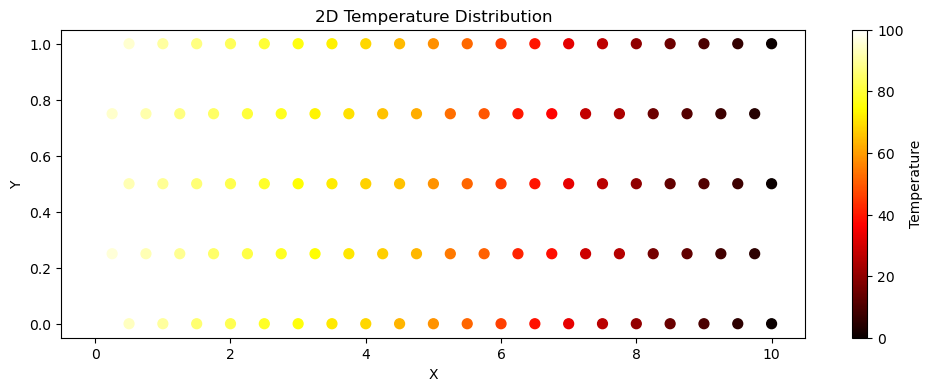

In [86]:
plt.figure(figsize=(12, 4))  
plt.scatter(points[:, 0], points[:, 1], c=x, cmap='hot', s=50)
plt.colorbar(label="Temperature")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Temperature Distribution")
plt.show()

####  VTK file
A widely used tool for visualising results is ParaView, which offers a range of powerful capabilities for data analysis, including viewing the model in detail in $3D$. It supports the `vtk` and `vtu` file formats, which store both mesh information and solution values at the nodes. The following function generates a `vtk` file containing the mesh and solution data. When this file is opened in ParaView, linear interpolation is applied within the elements for visualization.
 
It is also possible to view the `vtk` files online without downloading Paraview. The file can be uploaded to the following website, which provides a limited version of Paraview:
 
https://kitware.github.io/glance/app/

In [15]:
from FEM_Module.Support_functions import write_vtk

write_vtk(2,mesh, x, 2,"temperature", "scalar","final_temp_solution")


<img src="img/temp_result.png" alt="temp_result" width="500">


## Exercise: Linear Quadrilateral Elements
So far, we've been working with quadratic triangular elements. However, we can also solve the same problem using linear rectangular elements. By combining the results and methods from the previous exercises, we now have everything we need to set up and run the example using linear rectangles instead.

Using the mesh we defined before:

<img src="img/rectangular_mesh_simple.png" alt="rectangular_mesh_simple" width="500">

##### Step 1. Mesh Construction
Below are solutions from mesh connectivity matrix

In [87]:

## Solution to the connectivity matrix 
quad_mesh_connectivity=np.array([[0,1,7,6],[1,2,8,7],[2,3,9,8],[3,4,10,9],[4,5,11,10]])

# This corresponds to the following points
quad_mesh_points = np.array([[0.,0.],[2.,0.,],[4.,0.],[6.,0.,],[8.,0.],[10.,0.],
                          [0.,1.],[2.,1.,],[4.,1.],[6.,1.,],[8.,1.],[10.,1.]])

##### Step 2. Basis functions
Below are the solution functions for the derivatives of basis functions

In [88]:
## Solution to the basis functions exercise
### the local r axis is along x dimension and s is along the y dimension
                
### Derivatives of the linear quadrilateral element
def basis_fn_quad_linear_der_dNr(degree,point):
    # Derivative of basis functions with respect to r
    r = point[0]
    s = point[1]
    

    dNr = np.zeros((4,)) 
    dNr[0] = -0.25 * (1. - s)
    dNr[1] = 0.25 * (1. - s)
    dNr[2] = 0.25 * (1 + s)
    dNr[3] = -0.25 * ( 1 + s)
        
    return dNr
        
def basis_fn_quad_linear_der_dNs(degree,point):
    # Derivative of basis functions with respect to s
    r = point[0]
    s = point[1]
    
    dNs = np.zeros((4,)) ## for each basis function
    ## Corner nodes first
    dNs[0] = -0.25 * ( 1 - r)
    dNs[1] = -0.25 * ( 1 + r)
    dNs[2] = 0.25 * (1 + r)
    dNs[3] = 0.25 * ( 1 - r)

    return dNs
        
               

def basis_fn_quad_linear_der(degree, point):
    ## Givent the coordinate of the point in the local coordinate system (r,s)
    ## we evaulate the basis functions at that point 
    
    ## linear elements
    dNr = basis_fn_quad_linear_der_dNr(1,point)
    dNs = basis_fn_quad_linear_der_dNs(1,point)
       
    basis_functions = np.vstack((dNr,dNs)) 
        
    return basis_functions

##### Step 3. Matrix Accumulation
For linear quadrilateral we need to use different integration points and weights. The isoparametric quadrilateral elements is of dimension [-1,1] in r direction and [1,1] in s direction. We will also adjust the Jacobian function to use the relevant basis functions.

Then we put it all together and highlighted with `**` the parts we updated

In [89]:
quad_integration_points =[[-1./np.sqrt(3),-1/np.sqrt(3)],
                          [-1/np.sqrt(3),1/np.sqrt(3)],
                          [1/np.sqrt(3),-1/np.sqrt(3)],
                          [1/np.sqrt(3),1/np.sqrt(3)]]

quad_integration_weights=[1.,1.,1.,1.]

def jacobian_quad(degree, point, e_nodes):
    #e_nodes is numpy array (num_nodes, 2) of all the global coordinates of the nodes
    space_dim = 2 ## for now we assume dimension is 2
    
    ## in this case we are mapping 2D space to 2D so Jacobian is a square
    Jacobian_mat = np.zeros((space_dim,space_dim))
    
    dnr = basis_fn_quad_linear_der_dNr(degree, point)
    dns = basis_fn_quad_linear_der_dNs(degree, point)

    for dim in range(2):
        Jacobian_mat[0,dim] =np.dot(dnr, e_nodes[:,dim])# x coordinate
        Jacobian_mat[1,dim] =np.dot(dns, e_nodes[:,dim])# y coordinate
    
    det = np.linalg.det(Jacobian_mat)
    return det, Jacobian_mat
        
    


In [90]:
num_nodes = len(rectangular_mesh_points) #*** total number of nodes 

# Set up the empty linear system of equations
A_matrix = np.zeros((num_nodes, num_nodes))
b = np.zeros((num_nodes,))

## Iterate through each element in the mesh 
for element_ID, element in enumerate(rectangular_mesh_connectivity):
    
    # ***  get the list of integration points and the list of global IDs for nodes in the element
    IntegrationPoints, IP_weights = quad_integration_points,quad_integration_weights
    # *** 
    e_nodes_xy = rectangular_mesh_points[element]
    
   
    ## we first get the local stiffness matrix for the element by accumulating
    ## over all the integration points
    LHS = np.zeros((len(element), len(element)))
    for IP, weight in zip(IntegrationPoints,IP_weights):
        B = basis_fn_quad_linear_der(degree, IP)
        BT = B.transpose() * MatrixThermalConduct
        BT = np.matmul(BT, B)
        detJ, _ = jacobian_quad(degree, IP, e_nodes_xy) # *** using updated jacobian matrix 
        BT = BT * weight*(detJ) 
        LHS += BT # this is a element level stiffness matrix
        
    ## once LHS has been accumulated over all the integration points, we add it to the global matrix A_matrix
    ## this uses the global node IDs to determine which indices are updates
    for i in range(len(element)):
        for j in range(len(element)):
            col = int(element[i])
            row = int(element[j])
            A_matrix[row][col]+= LHS[int(j)][int(i)]


##### Step 4. Boundary Conditions
For this mesh there are only two points on the right and left boundaries: nodes 5 and 11 for right boundary, and nodes 0 and 6 for left boundary

In [91]:
          
#Step 5. Apply the boundary conditions

## Apply temperature of 0 on the right
for node in [5,11]:
    # set the right hand side vector value
    b[node] = 0.
    # set the corresponding row in matrix A to identity
    A_matrix[node,:] = 0
    A_matrix[node, node] = 1.
    
    
## Apply temperature of 100 on the left
for node in [0,6]:
    # set the right hand side vector value
    b[node] = 100.
    # set the corresponding row in matrix A to identity
    A_matrix[node,:] = 0
    A_matrix[node, node] = 1.

    ## solve the linear systme of equations
x = np.linalg.solve(A_matrix, b)


##### Step 5. Solution Visualisation
We can plot the solution as before and use the solution `x` as colour. For this case we can also plot the value along the top and bottom values directly.

From the graphs below we can see that the solutions are linear along the domain as expected. So for this problem using quadrilateral elements or triangles and of different degrees had no impact on solution. However, for more complex problems it could make a difference as explained in section 1 "Discretisation".

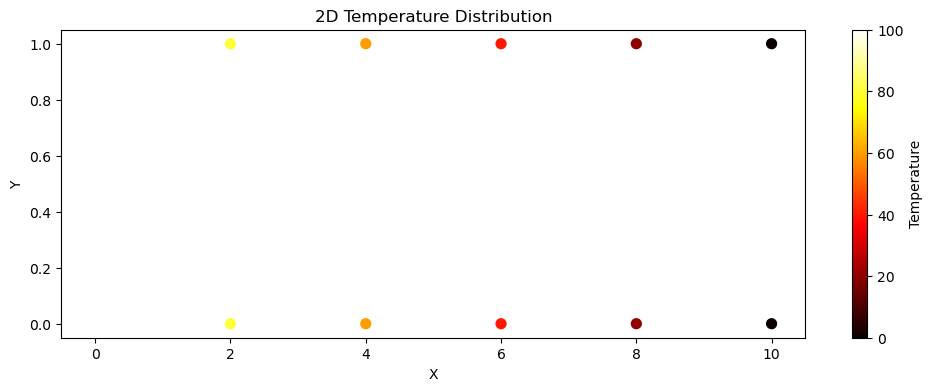

In [92]:
plt.figure(figsize=(12, 4))  
plt.scatter(rectangular_mesh_points[:, 0], rectangular_mesh_points[:, 1], c=x, cmap='hot', s=50)
plt.colorbar(label="Temperature")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2D Temperature Distribution")
plt.show()

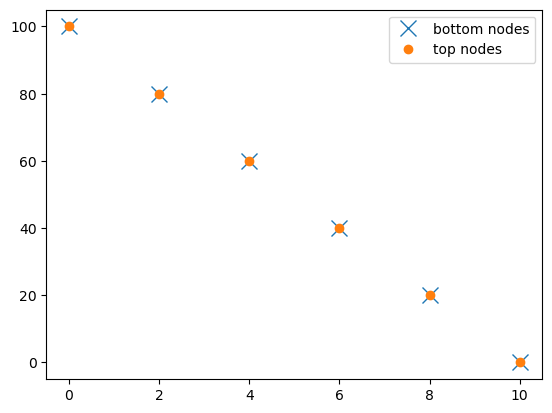

In [93]:
plt.plot(rectangular_mesh_points[:6][:, 0], x[:6], "x", label=("bottom nodes"), markersize=12)
plt.plot(rectangular_mesh_points[6:][:, 0],x[6:], "o", label=("top nodes"))
plt.legend()